In [1]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplots_from_df(df):
    num_cols = 2
    num_features = df.shape[1]
    num_rows = (num_features + 1) // num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    for i, feature in enumerate(df.columns):
        sns.boxplot(x=df[feature], ax=axs[i]) 
        axs[i].set_title("Boxplot of " + feature)
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

def show_countplots_by_target(df, columns, target_column_name):
    num_cols = 2
    num_features = len(columns)
    num_rows = (num_features + 1) // num_cols
    num_cols = 2
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    # Use a for loop to loop over each feature and create a countplot
    for i, feature in enumerate(columns):
        sns.countplot(x=feature, data=df, hue=target_column_name, ax=axs[i])
        axs[i].set_title(f"Countplot of {feature} by {target_column_name}")
        axs[i].set_ylabel('')
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

In [2]:
if not os.path.exists("dataset/data_validation.csv"):
    data_frame = pd.read_csv("dataset/data-ori.csv")
    df_train, df_validation = train_test_split(
        data_frame,
        test_size=0.10,
        stratify=data_frame['SOURCE'],
        random_state=20
    )
    
    df_train.to_csv("dataset/data_train.csv", index=False)
    df_validation.to_csv("dataset/data_validation.csv", index=False)

In [3]:
df_numerical=df_validation.loc[:,['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']]
df_categorical=df_validation.loc[:,['SEX','SOURCE']]

print("Data set shape: ",df_validation.shape)
print("Number of Duplicates: ",df_validation.duplicated().sum())
print("Nmber of NaN:", df_validation.isna().sum().sum())
print("\nData Info:")
df_validation.info()
print("\nData Head:")
df_validation.head()

Data set shape:  (442, 11)
Number of Duplicates:  0
Nmber of NaN: 0

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 2983 to 3531
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   442 non-null    float64
 1   HAEMOGLOBINS  442 non-null    float64
 2   ERYTHROCYTE   442 non-null    float64
 3   LEUCOCYTE     442 non-null    float64
 4   THROMBOCYTE   442 non-null    int64  
 5   MCH           442 non-null    float64
 6   MCHC          442 non-null    float64
 7   MCV           442 non-null    float64
 8   AGE           442 non-null    int64  
 9   SEX           442 non-null    object 
 10  SOURCE        442 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 41.4+ KB

Data Head:


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
2983,30.6,10.2,3.64,8.4,286,28.0,33.3,84.1,60,M,in
1110,42.3,13.7,5.16,4.5,203,26.6,32.4,82.0,29,M,in
2693,33.6,10.7,5.34,6.2,193,20.0,31.8,62.9,56,F,out
1664,36.2,11.8,4.38,11.7,335,26.9,32.6,82.6,38,F,in
3884,35.4,12.0,3.93,19.0,289,30.5,33.9,90.1,73,F,out


In [4]:
df_validation.nunique().to_frame('Unqiue Values')

,Unqiue Values
HAEMATOCRIT,203
HAEMOGLOBINS,92
ERYTHROCYTE,225
LEUCOCYTE,148
THROMBOCYTE,257
MCH,111
MCHC,64
MCV,197
AGE,89
SEX,2


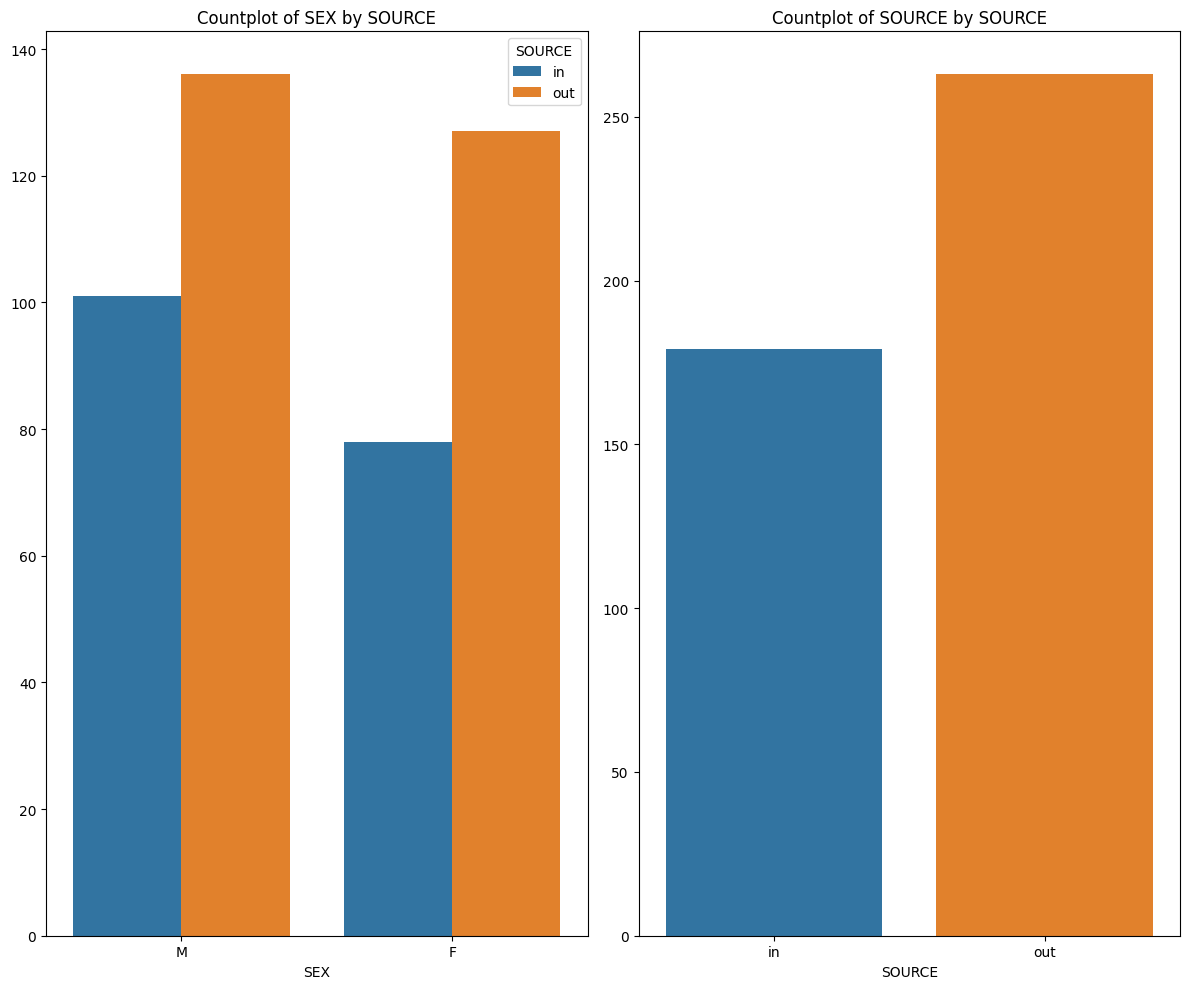

In [5]:
show_countplots_by_target(df_categorical, df_categorical.columns, "SOURCE")

In [6]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
HAEMATOCRIT,442.0,37.914932,6.051113,15.3,34.125,38.40,42.300,54.50
HAEMOGLOBINS,442.0,12.673529,2.080173,5.1,11.400,12.80,14.100,18.20
ERYTHROCYTE,442.0,4.515339,0.781915,1.8,3.990,4.56,5.030,6.79
LEUCOCYTE,442.0,8.879186,5.524891,1.4,5.700,7.50,10.475,56.70
THROMBOCYTE,442.0,257.203620,113.771040,8.0,187.500,254.50,316.750,872.00
MCH,442.0,28.241176,2.635606,16.8,27.100,28.70,29.800,34.70
MCHC,442.0,33.421493,1.209492,27.8,32.700,33.40,34.200,38.20
MCV,442.0,84.437783,6.693907,59.2,81.600,85.20,88.600,100.80
AGE,442.0,46.230769,21.811523,1.0,28.250,47.00,64.000,99.00


array([[<Axes: title={'center': 'HAEMATOCRIT'}>,
        <Axes: title={'center': 'HAEMOGLOBINS'}>,
        <Axes: title={'center': 'ERYTHROCYTE'}>],
       [<Axes: title={'center': 'LEUCOCYTE'}>,
        <Axes: title={'center': 'THROMBOCYTE'}>,
        <Axes: title={'center': 'MCH'}>],
       [<Axes: title={'center': 'MCHC'}>,
        <Axes: title={'center': 'MCV'}>, <Axes: title={'center': 'AGE'}>]],
      dtype=object)

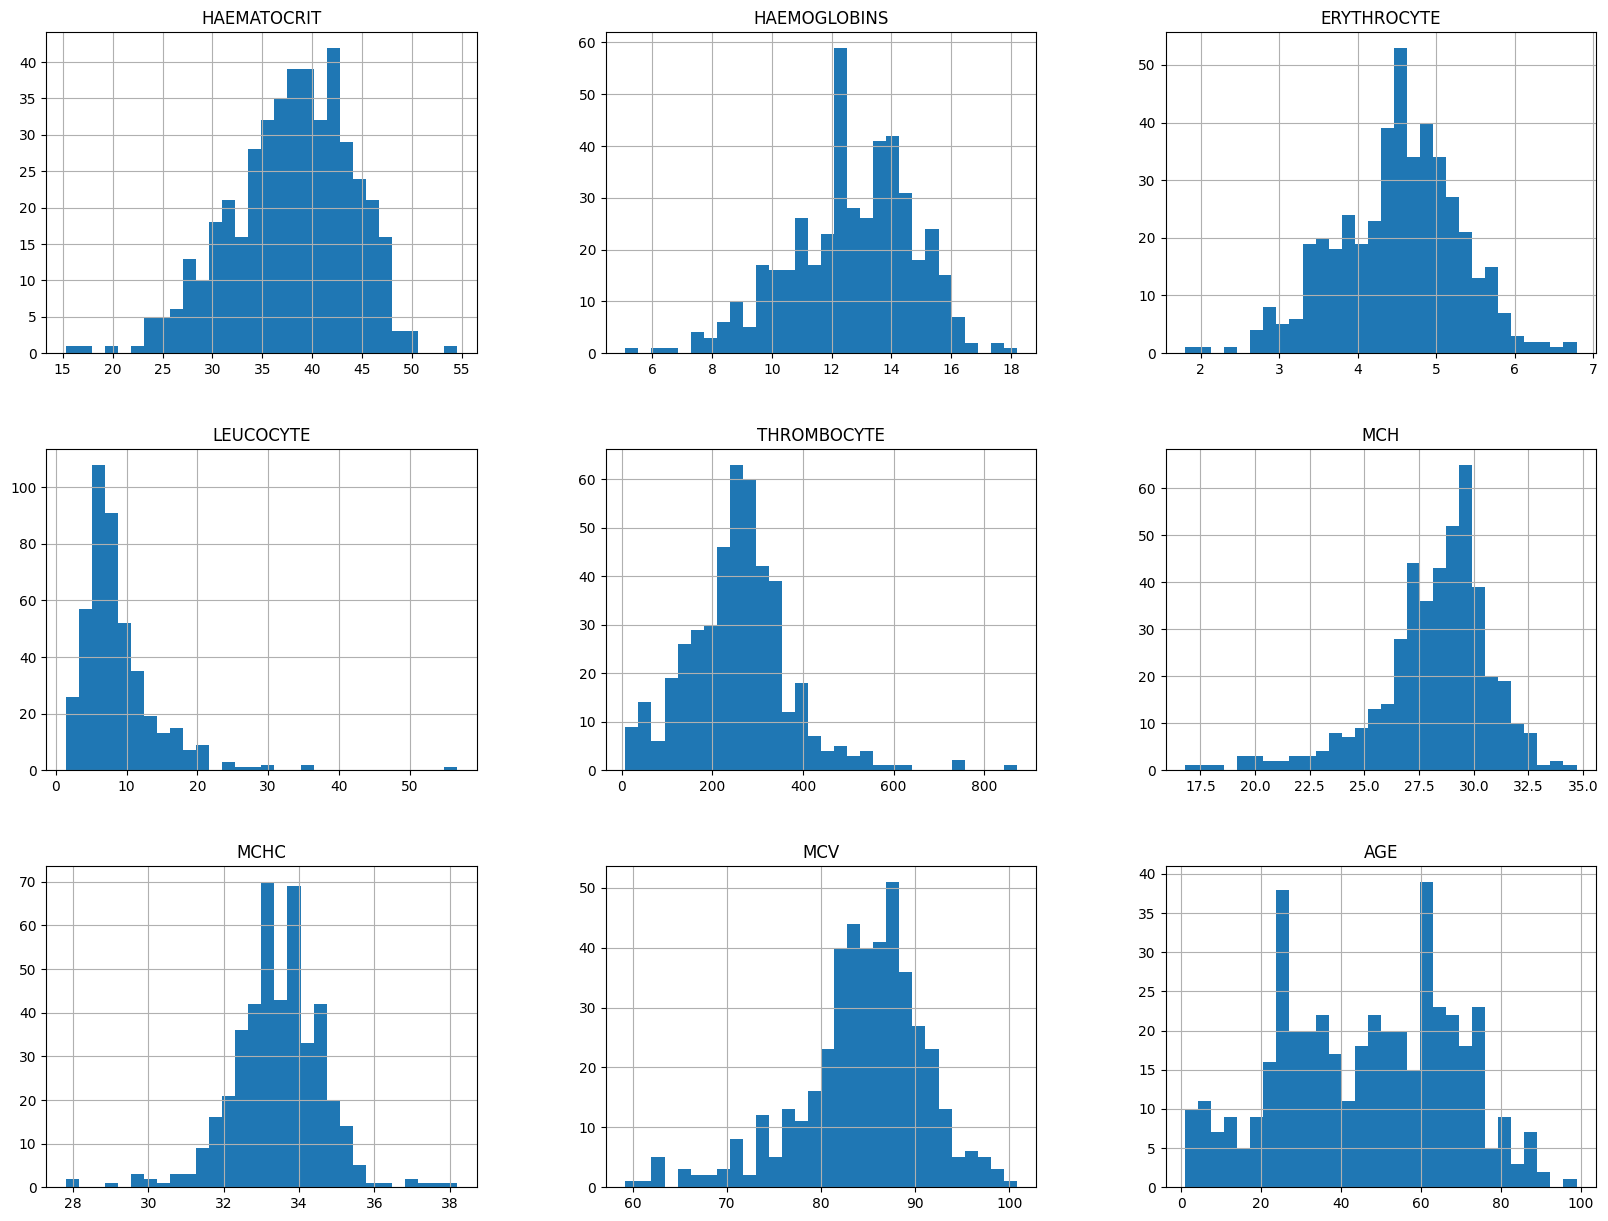

In [7]:
df_numerical.hist(bins=30, figsize=(20,15))

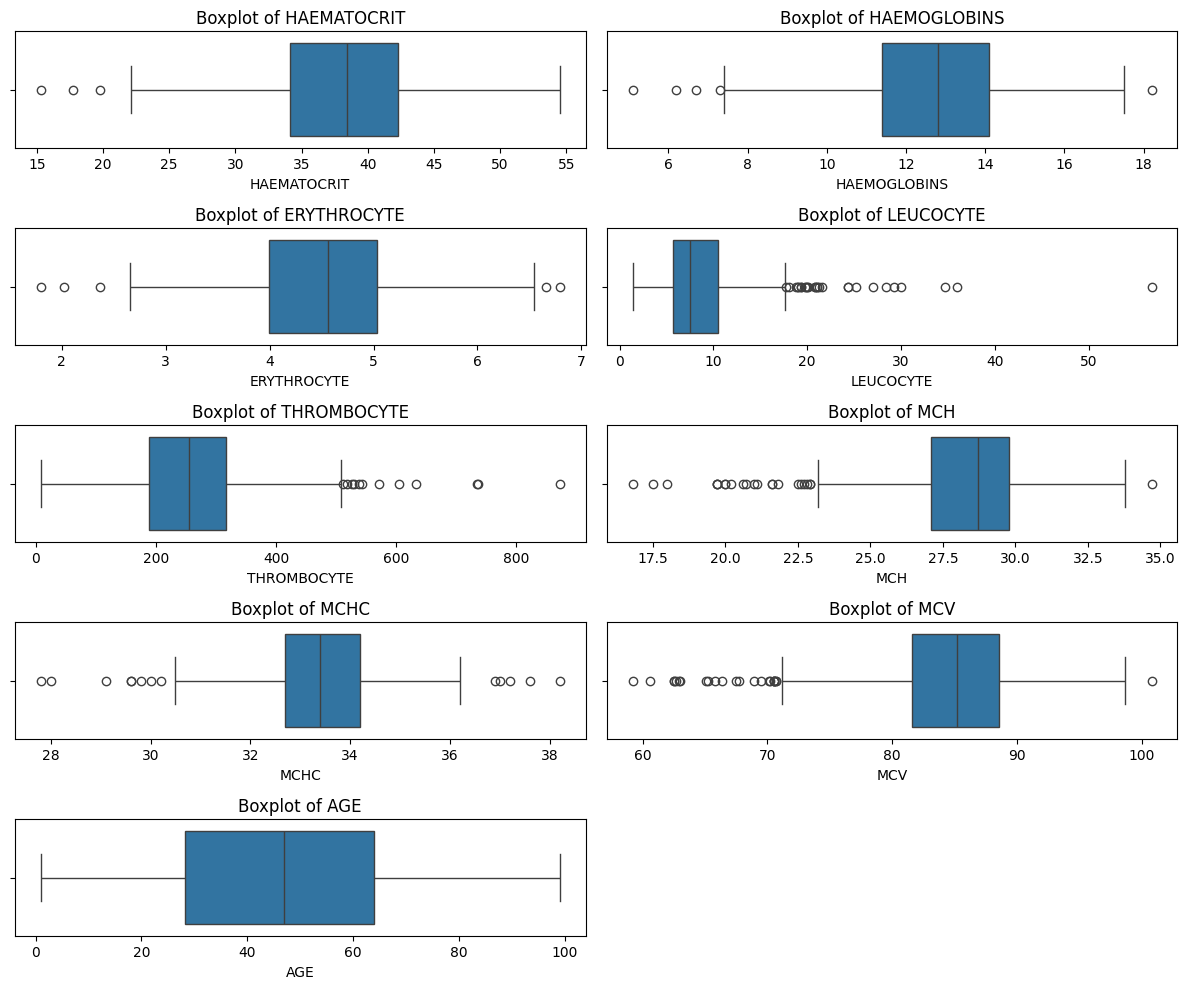

In [8]:
create_boxplots_from_df(df_numerical)

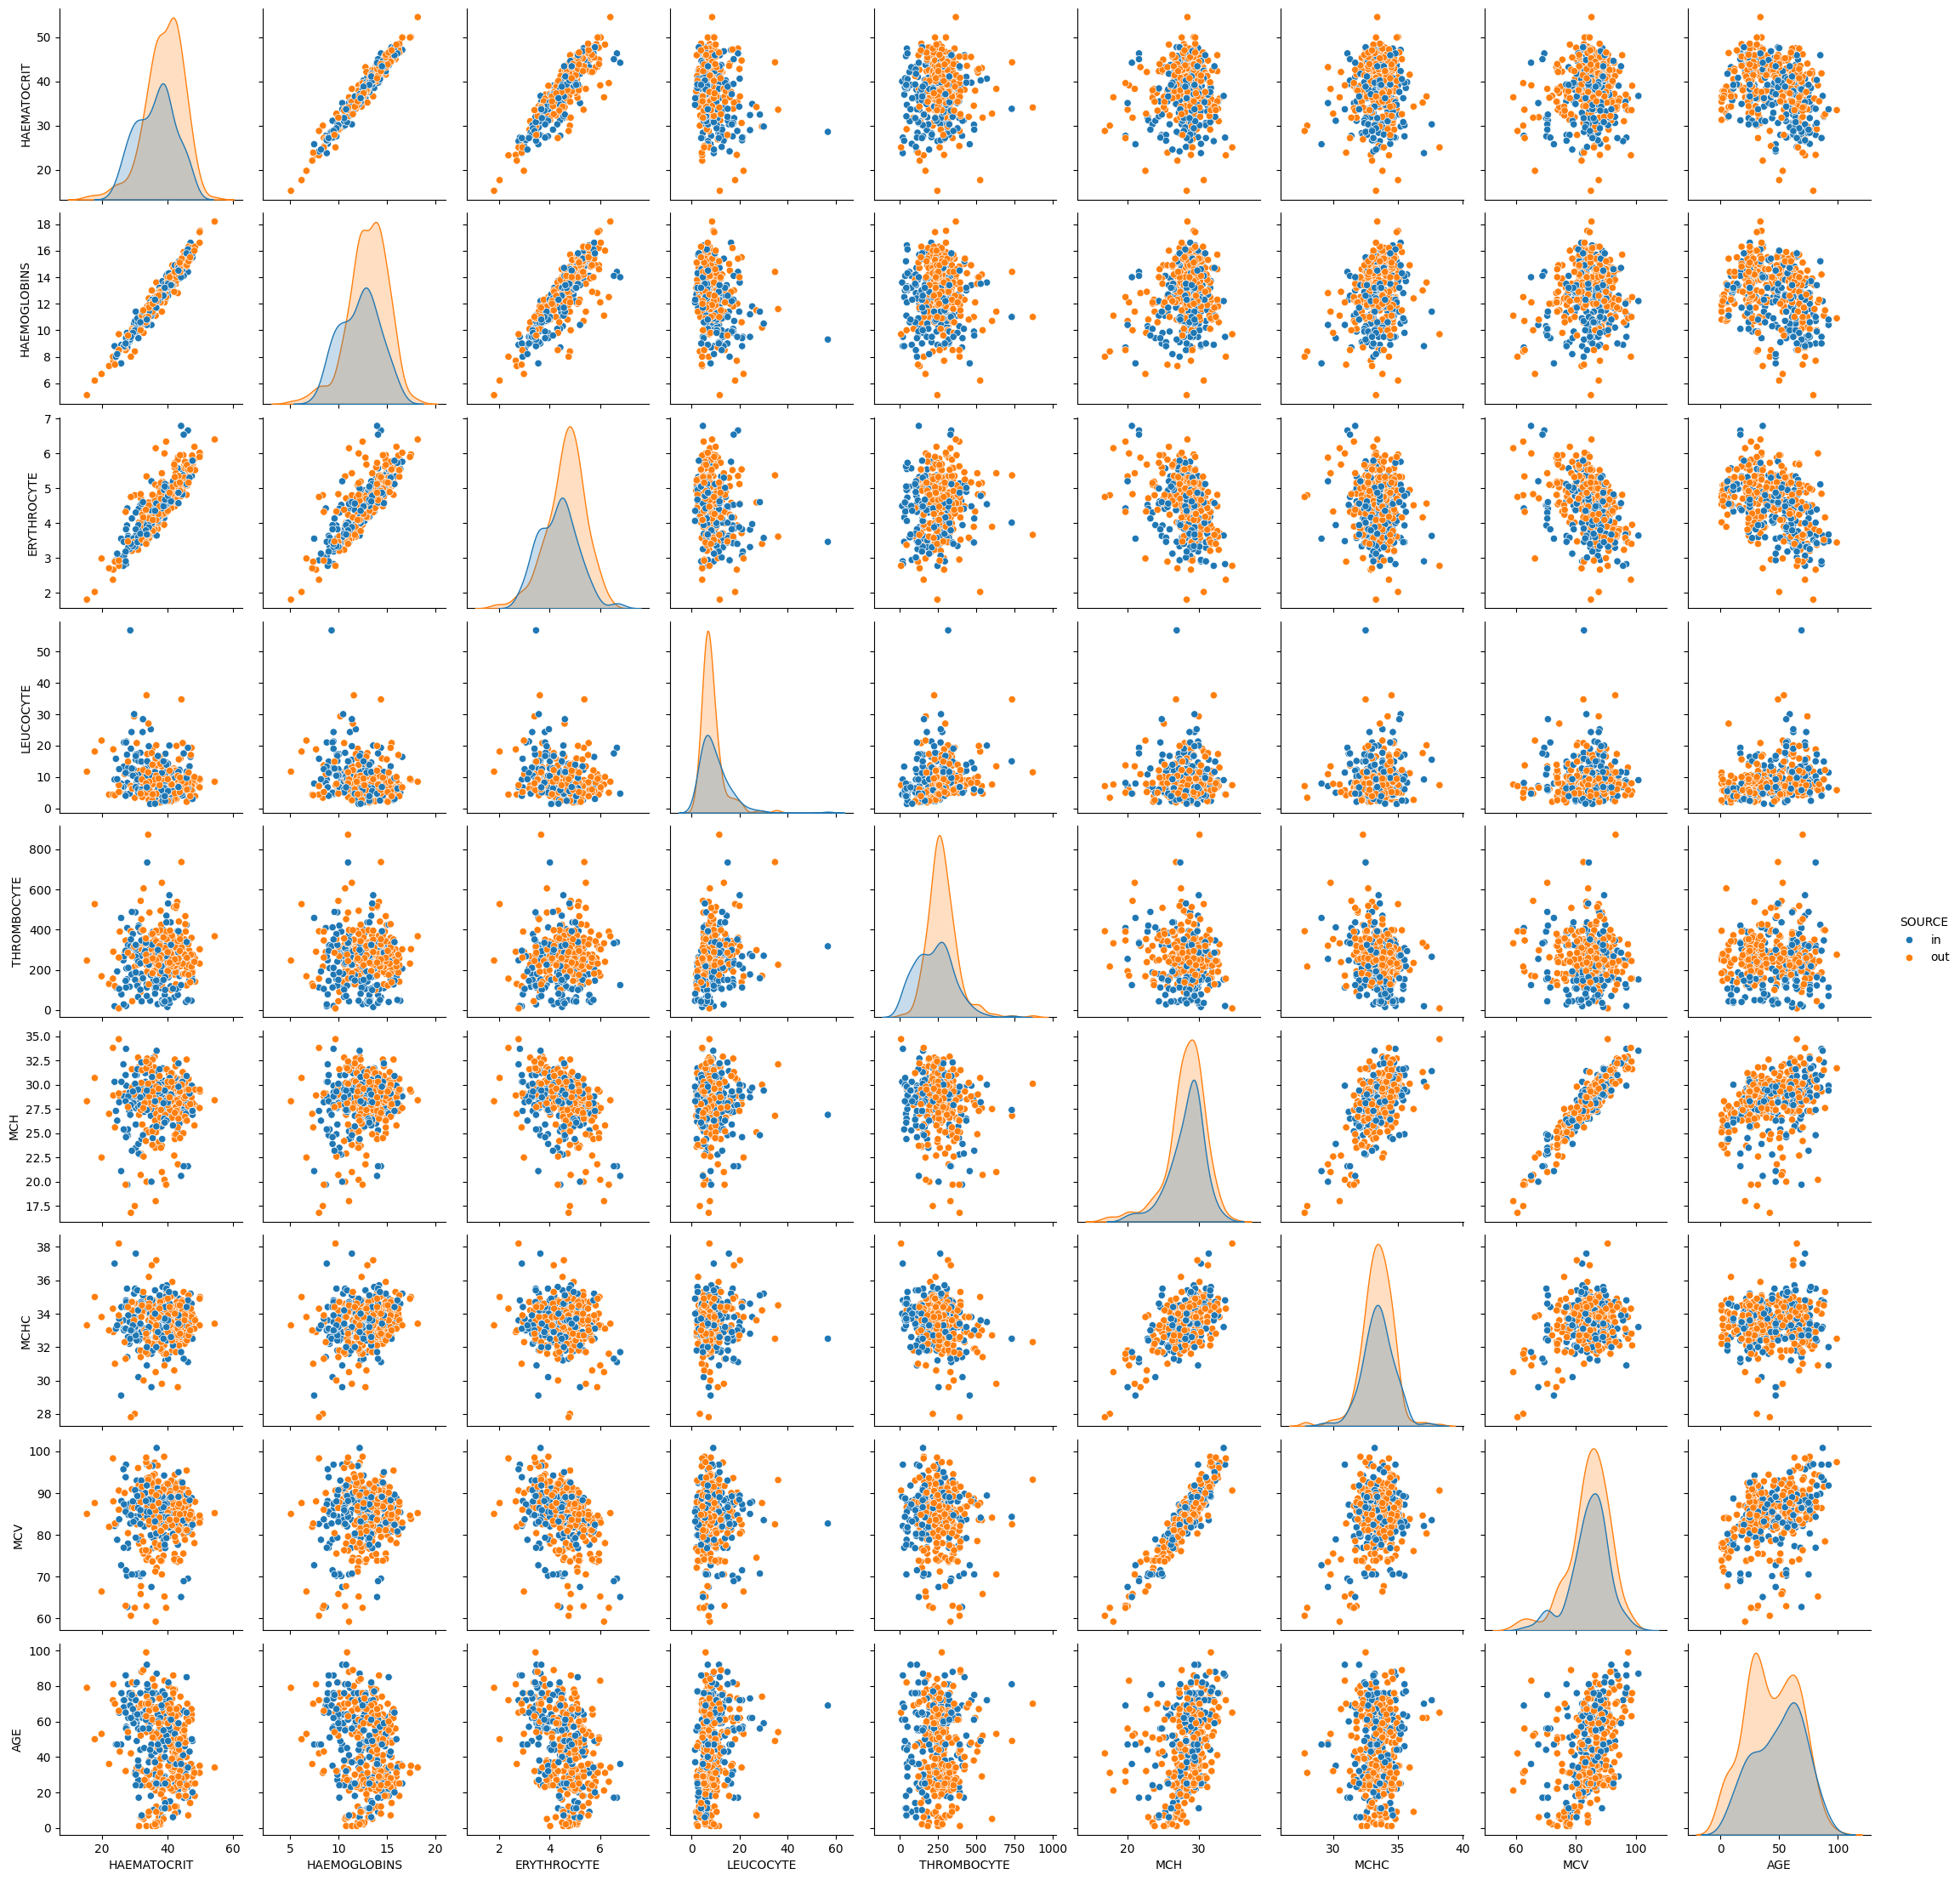

In [9]:
sns.pairplot(df_validation, hue='SOURCE')

In [10]:
numerical_correlation_mt = df_numerical.corr()
numerical_correlation_mt

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
HAEMATOCRIT,1.000000,0.977899,0.879700,-0.244370,0.045546,0.064381,0.017700,0.073509,-0.273084
HAEMOGLOBINS,0.977899,1.000000,0.830561,-0.232035,-0.007772,0.184599,0.223131,0.126501,-0.255221
ERYTHROCYTE,0.879700,0.830561,1.000000,-0.217407,0.077977,-0.383020,-0.129045,-0.400702,-0.430499
LEUCOCYTE,-0.244370,-0.232035,-0.217407,1.000000,0.238224,-0.006664,0.046061,-0.024873,0.239752
THROMBOCYTE,0.045546,-0.007772,0.077977,0.238224,1.000000,-0.162383,-0.256596,-0.081466,0.047680
MCH,0.064381,0.184599,-0.383020,-0.006664,-0.162383,1.000000,0.598358,0.934054,0.364297
MCHC,0.017700,0.223131,-0.129045,0.046061,-0.256596,0.598358,1.000000,0.275927,0.059654
MCV,0.073509,0.126501,-0.400702,-0.024873,-0.081466,0.934054,0.275927,1.000000,0.403956
AGE,-0.273084,-0.255221,-0.430499,0.239752,0.047680,0.364297,0.059654,0.403956,1.000000


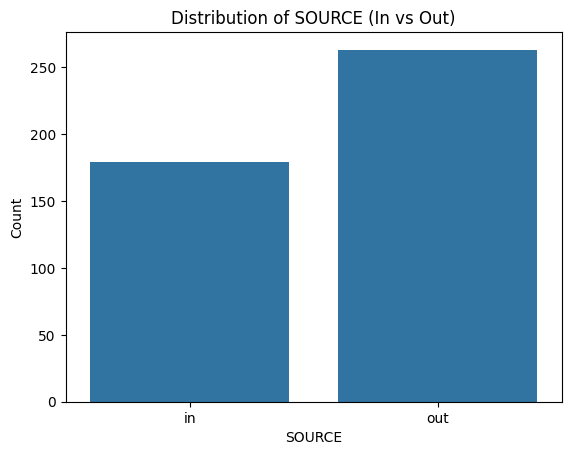

In [11]:
sns.countplot(x=df_validation['SOURCE'])
plt.title("Distribution of SOURCE (In vs Out)")
plt.xlabel("SOURCE")
plt.ylabel("Count")
plt.show()

In [12]:
source_counts = df_validation['SOURCE'].value_counts()
source_proportions = df_validation['SOURCE'].value_counts(normalize=True)
print("Counts of 'SOURCE':\n", source_counts)
print("\nProportions of 'SOURCE':\n", source_proportions)

Counts of 'SOURCE':
 SOURCE
out    263
in     179
Name: count, dtype: int64

Proportions of 'SOURCE':
 SOURCE
out    0.595023
in     0.404977
Name: proportion, dtype: float64
